In [63]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os as os   
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer 
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [6]:
dir = "Train"
lower_dir = "lowercase_train"
inverse_dir = "Inverse_train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

for i in os.listdir(lower_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(lower_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

for i in os.listdir(inverse_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(inverse_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        img = cv2.flip(img, 1)
        train_data.append([img,i])

In [7]:
len(train_data)

299211

In [8]:
test_dir = "Validation"
test_lower_dir = "lowercase_validation"
test_inverse_dir = "inverse_validation"
test_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(test_dir):
    if i in non_chars:
      continue
    count = 0
    sub_directory = os.path.join(test_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        if img is None:
          continue
        img = cv2.resize(img,(img_size,img_size))
        test_data.append([img,i])

for i in os.listdir(test_lower_dir):
    if i in non_chars:
      continue
    count = 0
    sub_directory = os.path.join(test_lower_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        if img is None:
          continue
        img = cv2.resize(img,(img_size,img_size))
        test_data.append([img,i])

for i in os.listdir(test_inverse_dir):
    if i in non_chars:
      continue
    count = 0
    sub_directory = os.path.join(test_inverse_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        if img is None:
          continue
        img = cv2.resize(img,(img_size,img_size))
        img = cv2.flip(img, 1)
        test_data.append([img,i])

In [64]:
len(test_data)

18989

In [65]:
random.shuffle(train_data)
random.shuffle(test_data)

In [66]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [67]:
test_X = []
test_Y = []
for features,label in test_data:
    test_X.append(features)
    test_Y.append(label)

In [68]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
test_Y = LB.fit_transform(test_Y)

In [12]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [13]:
test_X = np.array(test_X)/255.0
test_X = test_X.reshape(-1,32,32,1)
test_Y = np.array(test_Y)

In [14]:
print(train_X.shape,test_X.shape)

(299211, 32, 32, 1) (18989, 32, 32, 1)


In [15]:
print(train_Y.shape,test_Y.shape)

(299211, 79) (18989, 79)


In [16]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(79, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [19]:
history = model.fit(train_X,train_Y, epochs=20, batch_size=32, validation_data = (test_X, test_Y),  verbose=1)

Epoch 1/20
9351/9351 [==============================] - 444s 47ms/step - loss: 0.7888 - accuracy: 0.6955 - val_loss: 0.5098 - val_accuracy: 0.7929
Epoch 2/20
9351/9351 [==============================] - 328s 35ms/step - loss: 0.5395 - accuracy: 0.7537 - val_loss: 0.4204 - val_accuracy: 0.8316
Epoch 3/20
9351/9351 [==============================] - 295s 32ms/step - loss: 0.5024 - accuracy: 0.7629 - val_loss: 0.4367 - val_accuracy: 0.8251
Epoch 4/20
9351/9351 [==============================] - 305s 33ms/step - loss: 0.4828 - accuracy: 0.7683 - val_loss: 0.4551 - val_accuracy: 0.8073
Epoch 5/20
9351/9351 [==============================] - 277s 30ms/step - loss: 0.4705 - accuracy: 0.7709 - val_loss: 0.4285 - val_accuracy: 0.8246
Epoch 6/20
9351/9351 [==============================] - 273s 29ms/step - loss: 0.4621 - accuracy: 0.7730 - val_loss: 0.4288 - val_accuracy: 0.8272
Epoch 7/20
9351/9351 [==============================] - 316s 34ms/step - loss: 0.4546 - accuracy: 0.7738 - val_loss: 0

In [69]:
import pickle

In [28]:
pickle.dump(model, open('model.pkl', 'wb'))

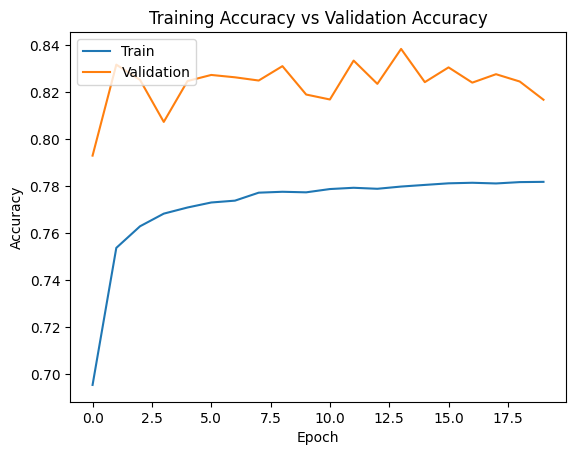

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

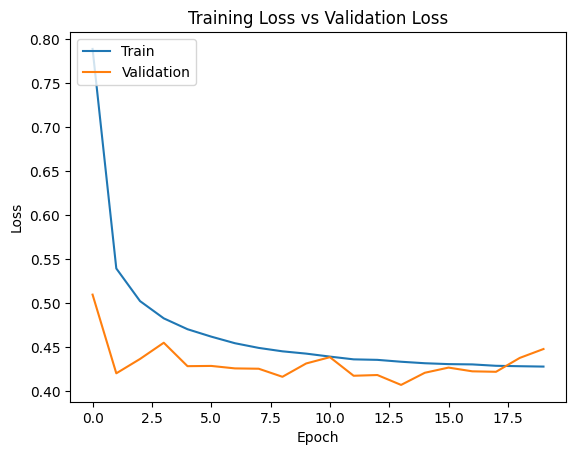

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [70]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [72]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        pickled_model = pickle.load(open('model.pkl', 'rb'))
        ypred = pickled_model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [76]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 171ms/step
(C)at


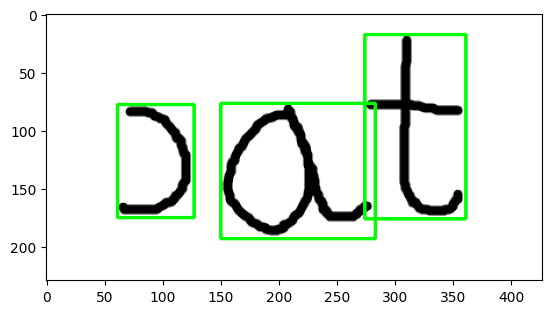

In [85]:
letter,image = get_letters("cat-2.png")
word = get_word(letter)
print(word)
plt.imshow(image)

In [5]:
import re
input_string = "(C)at"

pattern = r'\(([^)]+)\)'

letters_in_parentheses = re.findall(pattern, input_string)

for letters in letters_in_parentheses:
    print(letters)

C
